# Apple Stock Prediction using LSTM

In [1]:
#importing libraries.
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Using TensorFlow backend.


In [2]:
#Downloading the 'APPLE' stock data from yahoo finance website from 2013-jan to 2019-Dec.
df=pdr.DataReader('AAPL',data_source='yahoo',start='2013-01-01', end='2019-12-31')

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,19.121429,18.178572,18.233213,19.006071,659492400.0,16.569740
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.094694
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.878920
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.408764
2013-01-07,18.903572,18.400000,18.642857,18.710714,484156400.0,16.312239


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.580566
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.980911
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.953598
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,72.380653
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.909500


In [5]:
df.shape

(1763, 6)

In [6]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

C:\Users\sandeep\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


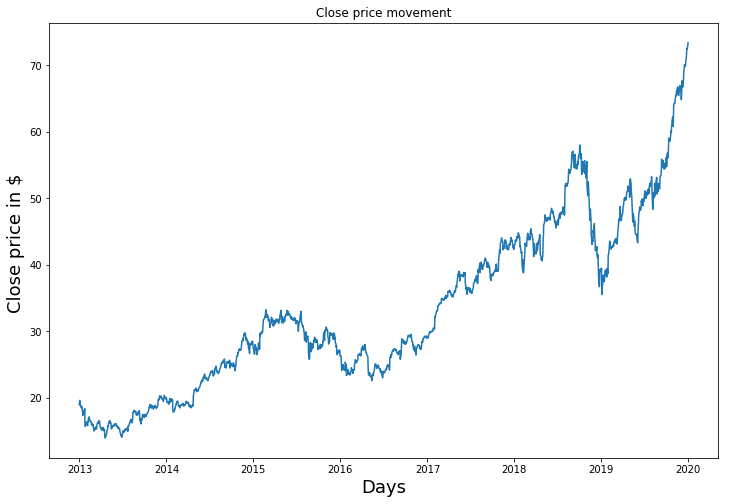

In [7]:
#Ploting the Close price movement from 2013-Jan to 2019-Dec
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.title('Close price movement')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close price in $ ',fontsize=18)
plt.show()

In [8]:
#we are intrested in only "Close" price of all the days. 
data=df.filter(['Close'])
dataset=data.values
len(dataset)

1763

In [9]:
##splitting dataset into train and test split
training_size=int(len(dataset)*0.70)
test_size=len(dataset)-training_size
training_size

1234

In [10]:
#LSTM model requires the data to be scaled.
#So we scaling the data between 0 to 1.
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [11]:
scaled_data

array([[0.08506804],
       [0.09519404],
       [0.09103193],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [13]:
#preparing the train_x  nad train_y data, taking the timestamp as 60.
#for predicting the tomarrow's stock price it takes past 60 days price.
train_data=scaled_data[0:training_size, :]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

In [14]:
#converting the data into numpy array 
x_train, y_train = np.array(x_train), np.array(y_train)
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


# Model Creation

In [32]:
model = Sequential()

model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 40))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [33]:
#Compiling the Model.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train,epochs = 25, batch_size = 16)

Epoch 1/25
1174/1174 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 2/25
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 3/25
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 4/25
1174/1174 [==============================] - 6s 5ms/step - loss: 9.1577e-04
Epoch 5/25
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 6/25
1174/1174 [==============================] - 6s 5ms/step - loss: 8.8485e-04
Epoch 7/25
1174/1174 [==============================] - 6s 5ms/step - loss: 7.8409e-04
Epoch 8/25
1174/1174 [==============================] - 6s 5ms/step - loss: 7.1424e-04
Epoch 9/25
1174/1174 [==============================] - 6s 5ms/step - loss: 7.6949e-04
Epoch 10/25
1174/1174 [==============================] - 6s 5ms/step - loss: 7.3647e-04
Epoch 11/25
1174/1174 [==============================] - 6s 5ms/step - loss: 6.3749e-04
Epoch 12/25
1174/1174 [==============================] - 

In [34]:
#Preparing the Test data same as training data.
test_data=scaled_data[training_size-60:, :]
x_test=[]
y_test=dataset[training_size:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [35]:
#converting the data into array.
x_test=np.array(x_test)

In [36]:
#changing the shape of test data.
x_test =np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [37]:
#predicting the test data
predictions=model.predict(x_test)
#predicted values are in between 0 to 1. So we inverse transforming the values
predictions=scaler.inverse_transform(predictions)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,predictions))

1.6946987658099657

C:\Users\sandeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


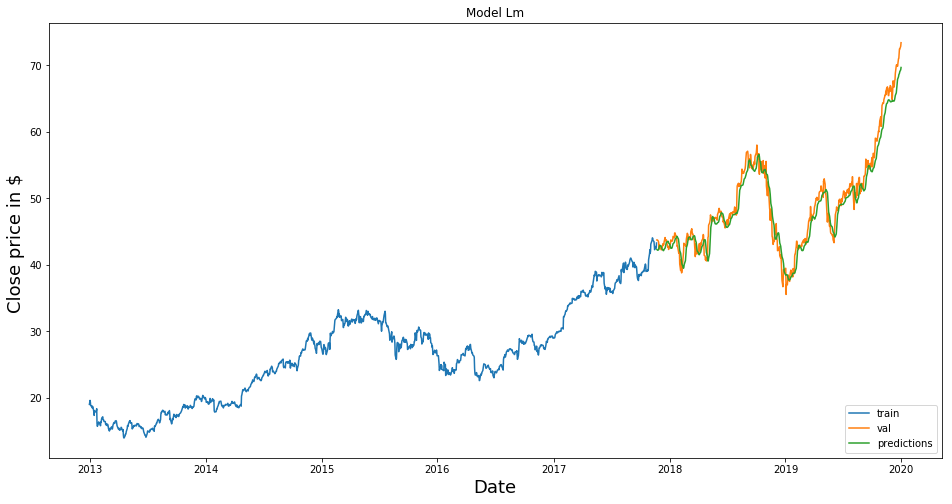

In [39]:
#plolting the original train data,test data and predicted data.
#we can observe our predictions are closer to the actual values.
train=data[:training_size]
valid=data[training_size:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model Lm')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price in $ ',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='lower right')
plt.show()